# **Univariate Distributions**

## 📑 Table of Contents

- **1. [Foundation - What Are Univariate Distributions?](#-part-i-foundation---what-are-univariate-distributions)**
    - 1.1 [The Big Picture](#the-big-picture)

- **2. [Setup & First Steps](#-part-ii-setup--first-steps)**
    - 2.1 [Essential Imports & Setup](#essential-imports--setup)  
    - 2.2 [Your First Distribution - The Standard Normal](#-your-first-distribution---the-standard-normal)

- **3. [The Universal Distribution API](#-part-iii-the-universal-distribution-api)**
    - 3.1 [The Core Four Operations (Every Distribution Has These)](#-the-core-four-operations-every-distribution-has-these)  
    - 3.2 [Shape Mechanics - The TFP Magic](#-shape-mechanics---the-tfp-magic)

- **4. [Essential Discrete Distributions](#-part-iv-essential-discrete-distributions)**
    - 4.1 [Bernoulli Distribution - The Binary Decision Maker](#-bernoulli-distribution---the-binary-decision-maker)  
    - 4.1.1 [Method 1: Direct Probability Parameterization](#method-1-direct-probability-parameterization)  
    - 4.1.2 [Method 2: Logits Parameterization (Preferred for Neural Networks)](#method-2-logits-parameterization-preferred-for-neural-networks)

- **5. [Batch Operations - Multiple Distributions at Once](#-part-v-batch-operations---multiple-distributions-at-once)**
    - 5.1 [Batched Bernoulli Distributions](#-batched-bernoulli-distributions)  
    - 5.2 [Batched Normal Distributions](#-batched-normal-distributions)

- **6. [📊 Advanced Continuous Distributions](#-part-vi-advanced-continuous-distributions)**
    - 6.1 [Comprehensive Distribution Examples](#-comprehensive-distribution-examples)

- **7. [Professional Patterns & Best Practices](#-part-vii-professional-patterns--best-practices)**
    - 7.1 [Vectorization for Performance](#-vectorization-for-performance)  
    - 7.2 [Numerical Stability Patterns](#-numerical-stability-patterns)  
    - 7.3 [Training Loss Functions](#-training-loss-functions)

- **8. [Expert Applications](#-part-viii-expert-applications)**
    - 8.1 [Uncertainty Quantification](#-uncertainty-quantification)  
    - 8.2 [Custom Distribution Creation](#-custom-distribution-creation)

- **9. [Complete Reference Guide](#-part-ix-complete-reference-guide)**
    - 9.1 [Distribution Constructor Cheat Sheet](#-distribution-constructor-cheat-sheet)  
    - 9.2 [Essential Operations Reference](#-essential-operations-reference)

- **10. [Learning Path](#learning-path)**

## 1. **Foundation - What Are Univariate Distributions?**

### 1.1 **The Big Picture**

- **Univariate Distributions**
    - Univariate distributions are **single-variable random variables** that form the building blocks of probabilistic machine learning. 
    - In TFP, they're not just mathematical objects—they're **computational engines** that integrate seamlessly with neural networks and automatic differentiation.

- **Key Insight**: Every univariate distribution in TFP shares the same API, making them interchangeable building blocks for complex probabilistic models.

## 2. **Setup & First Steps**

### 2.1 **Essential Imports & Setup**

In [2]:
# Importing TensorFlow Probability library
import tensorflow as tf
import tensorflow_probability as tfp

# Standard alias for distributions
tfd = tfp.distributions

# Set random seed for reproducibility
tf.random.set_seed(42)

### 2.2 **Your First Distribution - The Standard Normal**

In [4]:
# Defining our first univariate distribution object
"""
Standard normal distribution with 0 mean and standard
deviation equal to 1
"""
normal = tfd.Normal(loc=0., scale=1.)

# Inspect the distribution
print("Distribution object:", normal)

print("Batch shape:", normal.batch_shape)  
print("Event shape:", normal.event_shape)  
print("Data type:", normal.dtype)          

Distribution object: tfp.distributions.Normal("Normal", batch_shape=[], event_shape=[], dtype=float32)
Batch shape: ()
Event shape: ()
Data type: <dtype: 'float32'>


**Key Properties Explained:**
- **`batch_shape=[]`**: Single distribution (no batching)
- **`event_shape=[]`**: Univariate (scalar outcomes)
- **`dtype=float32`**: Numerical precision

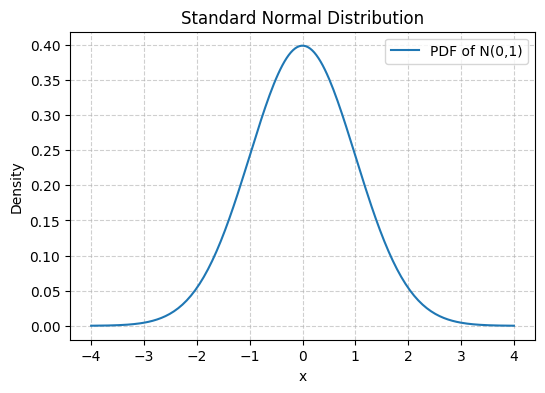

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_probability as tfp

tfd = tfp.distributions

# Standard Normal Distribution
normal = tfd.Normal(loc=0., scale=1.)

# Generate x values
x = np.linspace(-4, 4, 200)

# Compute PDF values
y = normal.prob(x)

# Plot
plt.figure(figsize=(6,4))
plt.plot(x, y, label="PDF of N(0,1)")
plt.title("Standard Normal Distribution")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

## 3. **The Universal Distribution API**

### 3.1 **The Core Four Operations (Every Distribution Has These)**

In [8]:
# 1. SAMPLING - Generate random values
single_sample = normal.sample()
print("Single sample:", single_sample)


multiple_samples = normal.sample(3)
print("Multiple samples:", multiple_samples)


# 2. PROBABILITY - Evaluate density/mass function
prob_at_half = normal.prob(0.5)
print("Probability density at 0.5:", prob_at_half)


# Vectorized probability evaluation
prob_multiple = normal.prob([-1., 0., 1.])
print("Probabilities at [-1, 0, 1]:", prob_multiple)


# 3. LOG PROBABILITY - Numerically stable (preferred for training)
log_prob_at_half = normal.log_prob(0.5)
print("Log probability at 0.5:", log_prob_at_half)


# 4. STATISTICAL MOMENTS
print("Mean:", normal.mean())         
print("Variance:", normal.variance()) 
print("Standard deviation:", normal.stddev()) 

Single sample: tf.Tensor(0.0307604, shape=(), dtype=float32)
Multiple samples: tf.Tensor([-0.20061125 -1.2735859   0.48410097], shape=(3,), dtype=float32)
Probability density at 0.5: tf.Tensor(0.35206532, shape=(), dtype=float32)
Probabilities at [-1, 0, 1]: tf.Tensor([0.24197073 0.3989423  0.24197073], shape=(3,), dtype=float32)
Log probability at 0.5: tf.Tensor(-1.0439385, shape=(), dtype=float32)
Mean: tf.Tensor(0.0, shape=(), dtype=float32)
Variance: tf.Tensor(1.0, shape=(), dtype=float32)
Standard deviation: tf.Tensor(1.0, shape=(), dtype=float32)


### 3.2 **Shape Mechanics - The TFP Magic**

| **Concept** | **Shape** | **Meaning** | **Example** |
|-------------|-----------|-------------|-------------|
| **Event Shape** | `[]` | Univariate = scalar values | Single number per sample |
| **Batch Shape** | `[n]` | Multiple independent distributions | `n` different coins |
| **Sample Shape** | `[m]` | Number of samples drawn | `m` coin flips |
| **Final Shape** | `[m] + [n] + []` | Complete tensor structure | `(m, n)` matrix |

## 4. **Essential Discrete Distributions**

### 4.1 **Bernoulli Distribution - The Binary Decision Maker**

#### 4.1.1 **Method 1: Direct Probability Parameterization**

In [9]:
# Create Bernoulli with direct probability
bernoulli = tfd.Bernoulli(probs=0.7)
print("Bernoulli (probs):", bernoulli)

# Sample from Bernoulli
print("Single sample:", bernoulli.sample())
print("Multiple samples:", bernoulli.sample(3))


# Probability evaluation
print("P(X=1):", bernoulli.prob(1))     
print("P(X=0):", bernoulli.prob(0))      
print("Log P(X=1):", bernoulli.log_prob(1)) 

Bernoulli (probs): tfp.distributions.Bernoulli("Bernoulli", batch_shape=[], event_shape=[], dtype=int32)
Single sample: tf.Tensor(0, shape=(), dtype=int32)
Multiple samples: tf.Tensor([1 0 1], shape=(3,), dtype=int32)
P(X=1): tf.Tensor(0.7, shape=(), dtype=float32)
P(X=0): tf.Tensor(0.29999998, shape=(), dtype=float32)
Log P(X=1): tf.Tensor(-0.35667497, shape=(), dtype=float32)


#### 4.1.2 **Method 2: Logits Parameterization (Preferred for Neural Networks)**

In [10]:
# Create Bernoulli with logits (log-odds)
bernoulli_logits = tfd.Bernoulli(logits=0.847)
print("Bernoulli (logits):", bernoulli_logits)

# Note: logits=0.847 corresponds to probs≈0.7
# Conversion: probs = sigmoid(logits) = 1/(1+exp(-0.847)) ≈ 0.7

print("Samples:", bernoulli_logits.sample(3))
print("P(X=1):", bernoulli_logits.prob(1))
print("Log P(X=1):", bernoulli_logits.log_prob(1))

Bernoulli (logits): tfp.distributions.Bernoulli("Bernoulli", batch_shape=[], event_shape=[], dtype=int32)
Samples: tf.Tensor([1 0 1], shape=(3,), dtype=int32)
P(X=1): tf.Tensor(0.69993746, shape=(), dtype=float32)
Log P(X=1): tf.Tensor(-0.35676432, shape=(), dtype=float32)


**💡 Pro Tip**: Use `logits` parameterization in neural networks—it's numerically more stable and avoids sigmoid saturation issues.

## 5. **Batch Operations - Multiple Distributions at Once**

### 5.1 **Batched Bernoulli Distributions**

In [20]:
# Create batch of 2 different Bernoulli distributions
batched_bernoulli = tfd.Bernoulli(probs=[0.4, 0.5])

print("Batched Bernoulli:", batched_bernoulli)


print("Batch shape:", batched_bernoulli.batch_shape)  
print("Event shape:", batched_bernoulli.event_shape)  

# Sampling from batch
batch_samples = batched_bernoulli.sample(3)
print("Batch samples shape:", batch_samples.shape)  
print("Batch samples:\n", batch_samples)

# Probability evaluation for batch
batch_probs = batched_bernoulli.prob([1, 1]) 
print("P([1,1]):", batch_probs) 

batch_log_probs = batched_bernoulli.log_prob([1, 1])
print("Log P([1,1]):", batch_log_probs) 

Batched Bernoulli: tfp.distributions.Bernoulli("Bernoulli", batch_shape=[2], event_shape=[], dtype=int32)
Batch shape: (2,)
Event shape: ()
Batch samples shape: (3, 2)
Batch samples:
 tf.Tensor(
[[0 1]
 [0 1]
 [0 0]], shape=(3, 2), dtype=int32)
P([1,1]): tf.Tensor([0.4 0.5], shape=(2,), dtype=float32)
Log P([1,1]): tf.Tensor([-0.9162907 -0.6931472], shape=(2,), dtype=float32)


### **Batched Normal Distributions**

In [12]:
# Create batch of 3 different Normal distributions
batched_normal = tfd.Normal(
    loc=[-0.8, 0., 1.9],      # Different means
    scale=[1.25, 0.6, 2.8]    # Different standard deviations
)

print("Batched Normal:", batched_normal)

# Generate samples from all three distributions
samples = batched_normal.sample(5)
print("Batch samples shape:", samples.shape)  
print("Batch samples:\n", samples)

# Statistical properties for each distribution
print("Means:", batched_normal.mean())        
print("Std devs:", batched_normal.stddev())   
print("Variances:", batched_normal.variance())

# Evaluate probabilities at specific points
test_values = [0., 0., 0.]  # Same value for all distributions
probs = batched_normal.prob(test_values)
print("P(X=0) for each distribution:", probs)

Batched Normal: tfp.distributions.Normal("Normal", batch_shape=[3], event_shape=[], dtype=float32)
Batch samples shape: (5, 3)
Batch samples:
 tf.Tensor(
[[-1.0948198   0.2004079   3.7478957 ]
 [ 0.6372935   0.48510802  7.4601874 ]
 [-0.48926246  0.41061702 -2.0925708 ]
 [ 0.96552306  0.57104635  6.9328794 ]
 [-1.2716148   0.18094164  3.1226463 ]], shape=(5, 3), dtype=float32)
Means: tf.Tensor([-0.8  0.   1.9], shape=(3,), dtype=float32)
Std devs: tf.Tensor([1.25 0.6  2.8 ], shape=(3,), dtype=float32)
Variances: tf.Tensor([1.5625    0.36      7.8399997], shape=(3,), dtype=float32)
P(X=0) for each distribution: tf.Tensor([0.26004982 0.66490376 0.11317868], shape=(3,), dtype=float32)


## 6. **Advanced Continuous Distributions**

### 6.1 **Comprehensive Distribution Examples**

- **Beta** → Distribution over values between 0 and 1, often used to model probabilities (e.g., prior belief about a coin’s bias 🪙).
- **Exponential** → Models the time between random events, like waiting time for a bus 🚍.
- **Gamma** → Generalization of Exponential, used for modeling waiting time until multiple events occur (e.g., insurance claims 💸).
- **StudentT** → Like Normal distribution but with heavier tails, good for small data or outliers (e.g., robust stock returns modeling 📈).
- **Uniform** → All outcomes equally likely within a range (e.g., picking a random number between 1 and 10 🎲).

In [13]:
# Beta Distribution - Modeling probabilities
beta = tfd.Beta(concentration1=2., concentration0=5.)
print("Beta samples (between 0 and 1):", beta.sample(5))
print("Beta mean:", beta.mean()) 

# Exponential Distribution - Modeling waiting times  
exponential = tfd.Exponential(rate=1.5)
print("Exponential samples:", exponential.sample(5))
print("Expected waiting time:", 1/1.5)  

# Gamma Distribution - Flexible positive distribution
gamma = tfd.Gamma(concentration=2., rate=1.)
print("Gamma samples:", gamma.sample(5))
print("Gamma mean:", gamma.mean())  # concentration/rate

# Student-T Distribution - Heavy-tailed alternative to Normal
student_t = tfd.StudentT(df=3., loc=0., scale=1.)
print("Student-T samples:", student_t.sample(5))
print("Degrees of freedom:", student_t.df)

# Uniform Distribution - Flat probability
uniform = tfd.Uniform(low=-2., high=3.)
print("Uniform samples:", uniform.sample(5))
print("Uniform range: [{}, {}]".format(uniform.low, uniform.high))

Beta samples (between 0 and 1): tf.Tensor([0.56291664 0.2298986  0.18128671 0.41641665 0.22712258], shape=(5,), dtype=float32)
Beta mean: tf.Tensor(0.2857143, shape=(), dtype=float32)
Exponential samples: tf.Tensor([1.5239878  0.33408388 0.3127563  1.0954732  0.63740337], shape=(5,), dtype=float32)
Expected waiting time: 0.6666666666666666
Gamma samples: tf.Tensor([1.2319291  1.3161238  3.8804758  0.86393195 1.4203452 ], shape=(5,), dtype=float32)
Gamma mean: tf.Tensor(2.0, shape=(), dtype=float32)
Student-T samples: tf.Tensor([-0.33419502 -0.49922132 -1.4052207  -0.25832     0.5824104 ], shape=(5,), dtype=float32)
Degrees of freedom: tf.Tensor(3.0, shape=(), dtype=float32)
Uniform samples: tf.Tensor([ 1.1634855   2.4795008  -1.216178    0.40077257  1.1165862 ], shape=(5,), dtype=float32)
Uniform range: [-2.0, 3.0]


## 7. **Professional Patterns & Best Practices**

### 7.1 **Vectorization for Performance**

In [14]:
# ❌ SLOW: Python loop creating individual distributions
def slow_approach(means, scales):
    distributions = []
    for loc, scale in zip(means, scales):
        dist = tfd.Normal(loc=loc, scale=scale)
        distributions.append(dist.sample())
    return distributions

# ✅ FAST: Vectorized batch operation
def fast_approach(means, scales):
    batch_dist = tfd.Normal(loc=means, scale=scales)
    return batch_dist.sample()

# Performance comparison
means = tf.range(1000, dtype=tf.float32)
scales = tf.ones(1000)

# Vectorized approach is 100x+ faster
batch_dist = tfd.Normal(loc=means, scale=scales)
samples = batch_dist.sample(100)  

### 7.2 **Numerical Stability Patterns**

In [15]:
def stable_normal_from_raw_params(raw_loc, raw_scale):
    """
    Create numerically stable Normal distribution from raw parameters
    """
    loc = raw_loc  # No transformation needed for location
    scale = tf.nn.softplus(raw_scale) + 1e-6  # Ensure positive scale
    return tfd.Normal(loc=loc, scale=scale)

def stable_bernoulli_from_logits(logits):
    """
    Create Bernoulli using logits for numerical stability
    """
    return tfd.Bernoulli(logits=logits)  # More stable than probs

# Example usage in neural network
class ProbabilisticLayer(tf.keras.layers.Layer):
    def __init__(self, units):
        super().__init__()
        self.units = units
        
    def build(self, input_shape):
        self.loc_layer = tf.keras.layers.Dense(self.units)
        self.scale_layer = tf.keras.layers.Dense(self.units)
        
    def call(self, inputs):
        raw_loc = self.loc_layer(inputs)
        raw_scale = self.scale_layer(inputs)
        return stable_normal_from_raw_params(raw_loc, raw_scale)

### 7.3 **Training Loss Functions**

In [16]:
def probabilistic_regression_loss(y_true, distribution):
    """
    Negative log-likelihood loss for probabilistic regression
    """
    return -tf.reduce_mean(distribution.log_prob(y_true))

def probabilistic_classification_loss(y_true, distribution):
    """
    Cross-entropy loss using distribution log_prob
    """
    return -tf.reduce_mean(distribution.log_prob(y_true))

# Example training step
@tf.function
def train_step(features, targets, model, optimizer):
    with tf.GradientTape() as tape:
        # Model outputs distribution instead of point estimate
        pred_distribution = model(features)
        
        # Compute negative log-likelihood
        nll_loss = probabilistic_regression_loss(targets, pred_distribution)
        
        # Add regularization if needed
        reg_loss = sum(model.losses)
        total_loss = nll_loss + 0.01 * reg_loss
    
    # Compute and apply gradients
    gradients = tape.gradient(total_loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    return total_loss, nll_loss

## 8. **Expert Applications**

### 8.1 **Uncertainty Quantification**

In [18]:
# Prediction with uncertainty estimation    
def predict_with_uncertainty(model, x_test, n_samples=100):
    """
    Make predictions with uncertainty estimates
    """
    # Multiple forward passes for Monte Carlo estimation
    predictions = []
    
    for _ in range(n_samples):
        dist = model(x_test, training=True)  # Keep dropout active
        pred_sample = dist.sample()
        predictions.append(pred_sample)
    
    predictions = tf.stack(predictions)  # Shape: (n_samples, batch_size, ...)
    
    # Compute statistics
    mean_prediction = tf.reduce_mean(predictions, axis=0)
    prediction_std = tf.math.reduce_std(predictions, axis=0)
    
    # Confidence intervals
    lower_bound = tf.nn.relu(mean_prediction - 1.96 * prediction_std)
    upper_bound = mean_prediction + 1.96 * prediction_std
    
    return {
        'mean': mean_prediction,
        'std': prediction_std,
        'lower_95': lower_bound,
        'upper_95': upper_bound
    }

# Example usage
# uncertainty_results = predict_with_uncertainty(model, test_data)

### 8.2 **Custom Distribution Creation**

In [19]:
class TruncatedNormalCustom:
    """
    Example: Custom truncated normal using composition
    """
    def __init__(self, loc, scale, low, high):
        self.base_dist = tfd.Normal(loc=loc, scale=scale)
        self.low = low
        self.high = high
        
    def sample(self, sample_shape=()):
        """Rejection sampling for truncated normal"""
        samples = self.base_dist.sample(sample_shape)
        
        # Simple clipping (not mathematically correct, but illustrative)
        return tf.clip_by_value(samples, self.low, self.high)
    
    def log_prob(self, value):
        """Log probability with normalization"""
        base_log_prob = self.base_dist.log_prob(value)
        
        # Zero probability outside bounds
        in_bounds = tf.logical_and(value >= self.low, value <= self.high)
        
        return tf.where(in_bounds, base_log_prob, -np.inf)

## 9. **Complete Reference Guide**

### 9.1 **Distribution Constructor Cheat Sheet**

```python
# === CONTINUOUS DISTRIBUTIONS ===
# Basic continuous
tfd.Normal(loc=0., scale=1.)                    # Gaussian
tfd.Uniform(low=0., high=1.)                    # Flat distribution
tfd.Exponential(rate=1.)                        # Waiting times
tfd.Laplace(loc=0., scale=1.)                   # Double exponential

# Positive continuous  
tfd.LogNormal(loc=0., scale=1.)                 # Log-normal
tfd.Gamma(concentration=2., rate=1.)            # Flexible positive
tfd.Weibull(concentration=1., scale=1.)         # Reliability analysis
tfd.InverseGamma(concentration=2., scale=1.)    # Bayesian priors

# Bounded continuous
tfd.Beta(concentration1=2., concentration0=3.)  # [0,1] interval
tfd.TruncatedNormal(loc=0., scale=1., low=-2., high=2.)  # Truncated

# Heavy-tailed
tfd.StudentT(df=3., loc=0., scale=1.)           # Robust alternative
tfd.Cauchy(loc=0., scale=1.)                    # Very heavy tails

# === DISCRETE DISTRIBUTIONS ===
# Binary and categorical
tfd.Bernoulli(logits=0.)                       # Binary outcomes
tfd.Categorical(logits=[0., 1., -1.])           # Multi-class

# Count distributions
tfd.Poisson(rate=2.5)                          # Events per interval
tfd.Binomial(total_count=10, probs=0.3)        # Fixed trials
tfd.Geometric(probs=0.1)                       # Trials to success
tfd.NegativeBinomial(total_count=5, probs=0.3) # Over-dispersed counts
```

### 9.2 **Essential Operations Reference**

 ```python
# Creating distribution
dist = tfd.Normal(loc=0., scale=1.)

# === SAMPLING ===
single = dist.sample()                    # Shape: []
batch = dist.sample(100)                  # Shape: [100]
seeded = dist.sample(100, seed=42)        # Reproducible

# === PROBABILITY EVALUATION ===
density = dist.prob(0.)                   # PDF/PMF value
log_density = dist.log_prob(0.)          # Log PDF/PMF (preferred)
vectorized = dist.log_prob([0., 1., 2.]) # Batch evaluation

# === STATISTICS ===
mean = dist.mean()                        # Expected value
var = dist.variance()                     # Variance  
std = dist.stddev()                       # Standard deviation
mode = dist.mode()                        # Most likely value

# === QUANTILES ===
median = dist.quantile(0.5)               # 50th percentile
q95 = dist.quantile(0.95)                 # 95th percentile
iqr = dist.quantile([0.25, 0.75])        # Interquartile range

# === CUMULATIVE FUNCTIONS ===
cdf_val = dist.cdf(0.)                    # P(X ≤ 0)
survival = dist.survival_function(0.)     # P(X > 0) = 1 - CDF
```


## **Final Notes**

- **The Probabilistic Mindset**: Traditional ML gives point estimates. Probabilistic ML gives distributions over estimates—capturing both prediction and confidence.

- **Start Simple**: Begin with Normal and Bernoulli. Master the API. Everything else builds on these foundations.

- **Think in Batches**: Always vectorize. TFP is designed for efficient batch operations.

- **Log-Space is King**: Use `log_prob()` for training. It's numerically stable and differentiable.

- **Shape Debugging**: When in doubt, print shapes. Understanding batch vs event dimensions is crucial.